# As hipóteses reais

## Introdução

O objetivo deste notebook é responder as hipóteses formuladas pelo rei de Lumi. Para esta quest, utilizaremos o dataset do projeto de conclusão do semestre da disciplina [1] e escolheremos algoritmos de aprendizado de máquina para os itens 1 e 2.

As hipóteses são:
- 1. Realizar normalização padrão dos atributos melhora a performance de modelos induzidos pelo algoritmo escolhido 
- 2. Reduzir a dimensionalidade do problema utilizando PCA melhora a performance de modelos induzidos pelo algoritmo escolhido
- 3. Para o conjunto de dados escolhido, o algoritmo de árvore de decisão induz um modelo com melhor performance do que o induzido pelo algoritmo de k -NN

O nosso dataset apresenta informações sobre turbinas de gás para analisar a emissão de gases à atmosfera, a citar CO e NOx. O dataset contém 36733 instâncias de 11 medidas de sensor acumuladas por uma hora, geradas por uma turbina à gas localizada na Turquia.

Criamos uma tabela para facilitar a visualização das informações obtidas pela biblioteca Pandas [2]:

In [1]:
import pandas as pd

colunas = ['Variável', 'Tradução', 'Abr.', 'Unidade', 'Mín', 'Máx', 'Média']

dados = [
    ['Temperatura ambiente', 'Ambient temperature', 'AP', 'C', 6.23, 37.10, 17.71],
    ['Pressão ambiente', 'Ambient pressure', 'AH', 'mbar', 985.85, 1036.56, 1013.07], 
    ['Umidade ambiente', 'Ambient humidity', '%', 24.08, 100.20, 77.87],
    ['Pressão de diferença do filtro de ar', 'Air filter difference pressure', 'AFDP', 'mbar', 2.09, 7.61, 3.93],
    ['Pressão de exaustão da turbina do gás', 'Gas turbine exhaust pressure', 'GTEP', 'mbar', 17.70, 40.72, 25.56],
    ['Temperatura de entrada da turbina', 'Turbine inlet temperature', 'TIT', 'C', 1000.85, 1100.89, 1081.43],
    ['Turbina após temperatura', 'Turbine after temperature', 'TAT', 'C', 511.04, 550.61, 546.16],
    ['Pressão de descarga do compressor', 'Compressor discharge pressure', 'CDP', 'mbar', 9.85, 15.16, 12.06],
    ['Rendimento energético da turbina', 'Turbine energy yield', 'TEY', 'MWH', 100.02, 179.50, 133.51],
    ['Monóxido de carbono', 'Carbon monoxide', 'CO', 'mg/m³', 0.00, 44.10, 2.37],
    ['Óxidos de nitrogênio', 'Nitrogen oxides', 'NOx', 'mg/m³', 25.90, 119.91, 65.29]
]

df_intro = pd.DataFrame(dados, columns=colunas)

df_intro

,Variável,Tradução,Abr.,Unidade,Mín,Máx,Média
0,Temperatura ambiente,Ambient temperature,AP,C,6.23,37.10,17.71
1,Pressão ambiente,Ambient pressure,AH,mbar,985.85,1036.56,1013.07
2,Umidade ambiente,Ambient humidity,%,24.08,100.20,77.87,NaN
3,Pressão de diferença do filtro de ar,Air filter difference pressure,AFDP,mbar,2.09,7.61,3.93
4,Pressão de exaustão da turbina do gás,Gas turbine exhaust pressure,GTEP,mbar,17.70,40.72,25.56
5,Temperatura de entrada da turbina,Turbine inlet temperature,TIT,C,1000.85,1100.89,1081.43
6,Turbina após temperatura,Turbine after temperature,TAT,C,511.04,550.61,546.16
7,Pressão de descarga do compressor,Compressor discharge pressure,CDP,mbar,9.85,15.16,12.06
8,Rendimento energético da turbina,Turbine energy yield,TEY,MWH,100.02,179.50,133.51
9,Monóxido de carbono,Carbon monoxide,CO,mg/m³,0.00,44.10,2.37


## Desenvolvimento

Importando as bibliotecas necessárias:

In [2]:
# Geral
import pandas as pd
import seaborn as sns

# Scikit-Learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error # Atualmente não se usa mais, mas estamos em uma versão antiga
from sklearn.pipeline import make_pipeline

# Modelos de aprendizado de máquina
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

Carregando o dataset a ser estudado

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Romulo177/python/refs/heads/main/gt_2015.csv')
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515
...,...,...,...,...,...,...,...,...,...,...,...
7379,3.62680,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.9930,89.172
7380,4.16740,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.1440,88.849
7381,5.48200,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.4140,96.147
7382,5.88370,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.3134,64.738


É possível analisar algumas características pelo método describe [3]

In [4]:
df.describe(include= 'all')

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,7384.000000,7384.00000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000
mean,17.225259,1014.50911,68.647464,3.598909,26.130149,1078.974689,546.642484,133.993380,12.097025,3.129986,59.890509
std,8.095783,6.89543,13.541116,0.610226,4.473737,19.762449,5.489066,16.179208,1.136601,2.234962,11.132464
min,-6.234800,989.40000,24.085000,2.368800,17.698000,1016.000000,516.040000,100.020000,9.870800,0.212800,25.905000
25%,11.073250,1009.67500,59.447250,3.117300,23.147000,1070.500000,544.747500,126.255000,11.465750,1.808175,52.399000
50%,17.456500,1014.00000,70.952000,3.538500,25.331000,1080.300000,549.720000,131.600000,11.933000,2.533400,56.838500
75%,23.684750,1018.30000,79.653750,4.194825,30.018250,1099.900000,550.030000,147.160000,13.148000,3.702550,65.093250
max,37.103000,1036.60000,96.666000,5.239500,40.716000,1100.400000,550.590000,179.500000,15.159000,41.097000,119.680000


### Hipótese 1: Normalizar os atributos melhora a performance [4]

Primeiro vamos definir nossos atributos (ou features) e o target (ou alvo) a ser predito [5-7]. A seleção dos features foi feita previamente pelo fator de inflação de variância (VIF) método utilizado no trabalho final [8-10]. Para visualizar melhor as informações relevantes, criaremos um dataframe novo.

In [5]:
FEATURES = ['AT', 'AP', 'AH', 'GTEP', 'TAT']
TARGET = ['CO']

df_filtro = df.reindex(FEATURES + TARGET, axis=1)

df_filtro = df_filtro.dropna()

df_filtro


,AT,AP,AH,GTEP,TAT,CO
0,1.95320,1020.1,84.985,20.116,544.92,7.4491
1,1.21910,1020.1,87.523,18.584,548.50,6.4684
2,0.94915,1022.2,78.335,22.264,549.95,3.6335
3,1.00750,1021.7,76.942,23.358,549.63,3.1972
4,1.28580,1021.6,76.732,23.483,549.68,2.3833
...,...,...,...,...,...,...
7379,3.62680,1028.5,93.200,19.087,541.59,10.9930
7380,4.16740,1028.6,94.036,19.016,542.28,11.1440
7381,5.48200,1028.5,95.219,18.857,543.48,11.4140
7382,5.88370,1028.7,94.200,23.563,550.11,3.3134


Realizaremos um split de dados em treino e teste, utilizando 10% dos dados para teste e uma semente aleatória a fim de garantir a replicabilidade do experimento [11,12]

In [6]:
TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 666

indices = df.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]

X_treino = df_treino.reindex(FEATURES, axis=1).values
y_treino = df_treino.reindex(TARGET, axis=1).values.ravel()

X_teste = df_teste.reindex(FEATURES, axis=1).values
y_teste = df_teste.reindex(TARGET, axis=1).values.ravel()

Utilizaremos um normalizador padrão da biblioteca Sckit-Learn [13] no conjunto de dados de treino

In [7]:
# Initialize the StandardScaler
normalizador = StandardScaler()

# Fit and transform the data
X_treino_norm = normalizador.fit_transform(X_treino)

print(X_treino)
print()
print(X_treino_norm)

[[  20.173 1007.9     81.192   24.864  550.21 ]
 [  10.925 1024.3     64.314   32.433  533.36 ]
 [  26.417 1005.6     58.885   19.988  549.95 ]
 ...
 [  22.886 1008.9     43.766   31.539  550.19 ]
 [  18.73  1017.      45.629   30.723  550.   ]
 [  18.589 1016.3     72.485   30.582  541.54 ]]

[[ 0.36234636 -0.96483412  0.9278353  -0.28655034  0.65116824]
 [-0.77584081  1.42821819 -0.31488163  1.4050191  -2.42872802]
 [ 1.13081961 -1.30044512 -0.71461562 -1.3762706   0.60364462]
 ...
 [ 0.69624577 -0.8189163  -1.82781844  1.20522216  0.64751258]
 [ 0.18475076  0.36301807 -1.69064688  1.02285716  0.61278378]
 [ 0.16739734  0.2608756   0.28674415  0.99134556 -0.93356176]]


Por fim, o modelo de aprendizado de máquina escolhido foi o de k-NN, no qual comparamos a eficiência da previsão com e sem a normalização, através da métrica do RMSE [5, 13]

In [8]:
# k-NN não normalizado
NUM_VIZINHOS = 3
modelo_knn = KNeighborsRegressor(n_neighbors=NUM_VIZINHOS)

modelo_knn.fit(X_treino, y_treino)

X_verdadeiro = X_teste
y_verdadeiro = y_teste

y_previsto = modelo_knn.predict(X_verdadeiro)

RMSE_nao_norm = mean_squared_error(y_verdadeiro, y_previsto) ** (1/2)

print(f"O RMSE do k-NN foi de {RMSE_nao_norm} unidades de y.")

O RMSE do k-NN foi de 0.8595412738083922 unidades de y.


In [9]:
# k-NN normalizado
NUM_VIZINHOS = 3
modelo_knn_norm = KNeighborsRegressor(n_neighbors=NUM_VIZINHOS)

modelo_knn_norm.fit(X_treino_norm, y_treino)

X_verdadeiro = X_teste
y_verdadeiro = y_teste

y_previsto = modelo_knn_norm.predict(X_verdadeiro)

RMSE_norm = mean_squared_error(y_verdadeiro, y_previsto) ** (1/2)

print(f"O RMSE do k-NN normalizado foi de {RMSE_norm} unidades de y.")

O RMSE do k-NN normalizado foi de 1.990432869024726 unidades de y.


Representando o RMSE de cada modelo em um gráfico do Seaborn [14]

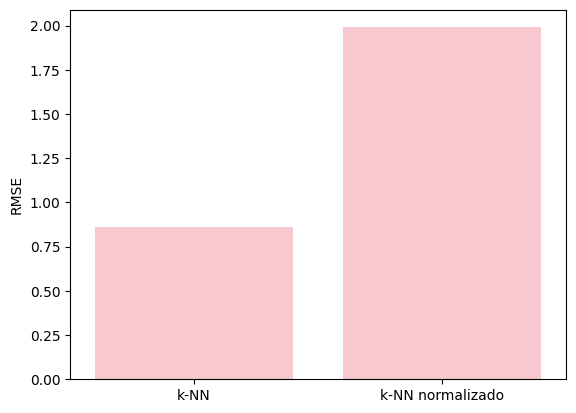

In [10]:
eixo = sns.barplot(x=['k-NN','k-NN normalizado'], y=[RMSE_nao_norm,RMSE_norm], color="Pink")

eixo.set_ylabel("RMSE");

Percebe-se que o modelo de k-NN normal se saiu muito melhor do que o normalizado, com um RMSE menos da metade

### Hipótese 2: Utilizar o PCA melhora a performance [15, 16]

Primeiro vamos tentar representar nossos atributos em um espaço bidimensional. Para isso, precisamos dos autovalores e autovetores associados

In [11]:
X = df.reindex(FEATURES, axis=1)
y = df[TARGET]

NUM_DIMENSOES = 2 # no final da transformação

pca = PCA(NUM_DIMENSOES) # instância
pca.fit(X) # ajusta aos dados - centraliza, calcula matriz, autovalor e autovetor e ordenando matriz, etc

autovalores = pca.explained_variance_
autovetores = pca.components_.T

print("Autovalores:\n", autovalores)
print()
print("Autovetores:\n", autovetores)

Autovalores:
 [206.35713927  74.14061049]

Autovetores:
 [[ 0.36106923 -0.5925517 ]
 [-0.10958055  0.65818092]
 [-0.92031914 -0.30184164]
 [ 0.10290224  0.10251586]
 [ 0.00670277 -0.33773136]]


Em seguida, aplicamos o PCA nos atributos e criamos um dataframe para representar cada PC, com os primeiros tendo um peso maior na decisão

In [12]:
X_reduzido = pca.transform(X)

nomes_componentes = [f"PC{i+1}" for i in range(NUM_DIMENSOES)]
df_pca = pd.DataFrame(X_reduzido, columns=nomes_componentes)

df_pca

,PC1,PC2
0,-21.793085,7.763144
1,-24.527566,6.065930
2,-16.010865,10.268938
3,-14.542571,10.545964
4,-14.224663,10.374553
...,...,...
7379,-29.797905,10.839697
7380,-30.385737,10.092529
7381,-30.997173,8.469086
7382,-29.407545,6.913551


Agora podemos plotar um gráfico com essas informações [14]:

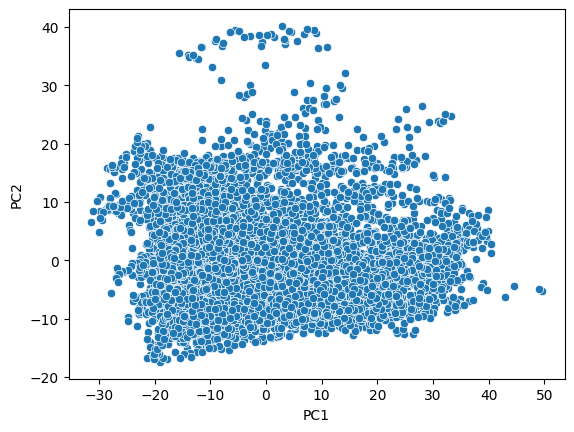

In [13]:
eixo = sns.scatterplot(
    df_pca,
    x="PC1",
    y="PC2",
)

A fim de comparar a eficácia dos modelos pelo PCA, vamos novamente fazer um split padrão dos dados, com 10% para teste e uma semente aleatória única

In [14]:
TAMANHO_TESTE  = 0.1
SEMENTE_ALEATORIA = 666

X_treino, X_teste, y_treino, y_teste = train_test_split(
    X, y, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

Criamos um pipeline, mesmo que simples, para realizar um regressor k-NN, com k = 3, sem o uso do PCA [17, 18]

In [15]:
NUM_VIZINHOS = 3

modelo = make_pipeline(
    KNeighborsRegressor(n_neighbors=NUM_VIZINHOS),
)

modelo.fit(X_treino, y_treino)

Pipeline(steps=[('kneighborsregressor', KNeighborsRegressor(n_neighbors=3))])

Agora prevemos os resultados e computamos o RMSE

In [16]:
X_verdadeiro = X_teste
y_verdadeiro = y_teste

y_previsto = modelo.predict(X_verdadeiro)

RMSE_nao_pca = mean_squared_error(y_verdadeiro, y_previsto) ** (1/2)

print(f"O RMSE do modelo foi de {RMSE_nao_pca} unidades de y.")

O RMSE do modelo foi de 0.8595412738083922 unidades de y.


Para o segundo modelo, a pipeline inclue a PCA, ajustando-se aos dados

In [17]:
NUM_COMPONENTES = 2

modelo_pca = make_pipeline(
    PCA(NUM_COMPONENTES),
    KNeighborsRegressor(n_neighbors=NUM_VIZINHOS),
)

modelo_pca.fit(X_treino, y_treino)

Pipeline(steps=[('pca', PCA(n_components=2)),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=3))])

Por fim, realizamos o mesmo processo para a previsão e o cálculo do RMSE

In [18]:
X_verdadeiro = X_teste
y_verdadeiro = y_teste

y_previsto = modelo_pca.predict(X_verdadeiro)

RMSE_pca = mean_squared_error(y_verdadeiro, y_previsto) ** (1/2)

print(f"O RMSE do modelo foi de {RMSE_pca} unidades de y.")

O RMSE do modelo foi de 2.034203873295833 unidades de y.


Representando o RMSE de cada modelo em um gráfico

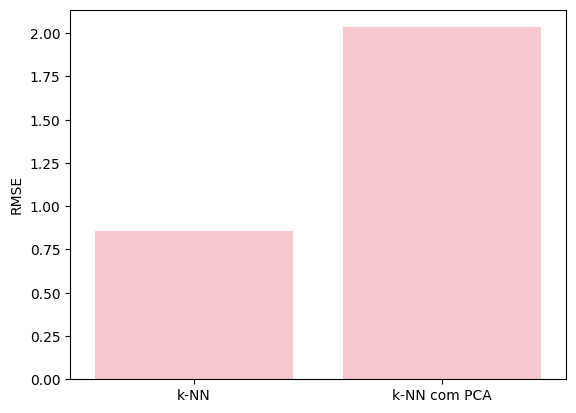

In [19]:
eixo = sns.barplot(x=['k-NN','k-NN com PCA'], y=[RMSE_nao_pca,RMSE_pca], color="Pink")

eixo.set_ylabel("RMSE");

É evidente que para o regressor k-NN, tanto a normalização dos dados quanto a redução de dimensionalidade pelo PCA pioraram o modelo, apresentando um maior RMSE

### Hipótese 3: Árvore de decisão tem melhor performance do que o k -NN [19, 20]

Primeiro, treinaremos cada um dos modelos separadamente, fazendo um split de dados para treino e teste. Depois, compararemos a eficiência dos modelos utilizando a métrica do RMSE.

Relembrando os atributos e o target, além de tirar células com valores inválidos (NAN - not a number)

In [20]:
ATRIBUTOS = ['AT', 'AP', 'AH', 'GTEP', 'TAT']
TARGET = ['CO']

df = df.reindex(ATRIBUTOS + TARGET, axis=1)
df = df.dropna()

Fazendo o split de dados

In [21]:
TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 666

indices = df.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]

X_treino = df_treino.reindex(ATRIBUTOS, axis=1).values
y_treino = df_treino.reindex(TARGET, axis=1).values.ravel()

X_teste = df_teste.reindex(ATRIBUTOS, axis=1).values
y_teste = df_teste.reindex(TARGET, axis=1).values.ravel()

#### Árvore de Decisão:

Criando uma instância para o modelo de árvore de decisão, com a mesma semente do split de dados

In [22]:
modelo_ad = DecisionTreeRegressor(random_state = SEMENTE_ALEATORIA)

Ajustamos aos dados e prevemos o target

In [28]:
modelo_ad.fit(X_treino, y_treino)

y_verdadeiro = y_teste
y_previsto_ad = modelo_ad.predict(X_teste)
y_previsto_ad

array([ 1.2176 ,  3.47   ,  2.6362 ,  2.0122 ,  5.6029 ,  4.6746 ,
        2.7422 ,  2.9324 ,  2.3735 ,  2.8718 ,  2.1854 ,  4.1365 ,
        2.1822 ,  1.8631 ,  1.8736 ,  2.6338 ,  9.1227 ,  1.0969 ,
        5.3552 ,  5.7839 ,  2.741  ,  1.7519 ,  3.2251 ,  2.4072 ,
        2.6918 ,  3.5999 ,  2.2455 ,  4.9339 ,  3.1963 ,  4.5105 ,
        1.9785 ,  2.874  ,  4.2931 , 10.895  ,  1.5302 ,  0.81474,
       10.575  ,  2.1144 ,  5.2746 ,  1.8997 ,  2.4852 ,  3.6634 ,
        1.8704 ,  2.7064 ,  4.1676 ,  1.4768 ,  3.7683 ,  1.533  ,
        1.145  ,  2.3816 ,  9.0835 ,  2.8953 ,  1.1558 ,  7.6367 ,
        1.8507 ,  1.5808 ,  1.7357 ,  2.1478 ,  1.4598 ,  1.8454 ,
        1.0142 ,  2.691  ,  2.6053 ,  2.4732 ,  1.6283 ,  4.2148 ,
        1.3202 ,  1.5978 ,  1.7255 ,  4.2067 ,  3.6872 ,  2.9016 ,
        1.18   ,  1.3212 ,  2.4286 ,  3.6872 ,  2.8509 ,  3.1563 ,
        1.6998 ,  1.4608 ,  1.9375 ,  1.7302 ,  1.9196 ,  3.7616 ,
        1.7608 ,  1.155  ,  3.7582 ,  2.9705 ,  2.6993 ,  1.16

#### K - NN:

O processo é similar, instanciamos o modelo, ajustamos às features e prevemos o target

In [29]:
# Criar uma instância do modelo
NUM_VIZINHOS = 3
modelo_knn = KNeighborsRegressor(n_neighbors=NUM_VIZINHOS)

# Ajustar o modelo aos dados - Treinamento
modelo_knn.fit(X_treino, y_treino)


y_verdadeiro = y_teste
y_previsto_knn = modelo_knn.predict(X_teste)
y_previsto_knn

array([ 2.39810333,  3.406     ,  1.9148    ,  2.05016667,  5.94446667,
        5.6027    ,  4.17746667,  2.8965    ,  1.96643333,  2.85176667,
        2.64133333,  4.01246667,  1.72673333,  1.60863333,  2.4982    ,
        3.27116667,  9.5756    ,  1.5511    ,  6.08036667,  6.43643333,
        2.86183333,  1.73453333,  3.67096667,  3.22036667,  2.40256667,
        4.04486667,  1.8613    ,  3.99806667,  3.78443333,  3.29886667,
        2.10516667,  2.25096667,  3.92686667, 10.03766667,  1.9033    ,
        1.99503333,  7.52796667,  2.09383333,  2.25416667,  1.3973    ,
        2.17723333,  3.58056667,  1.56066667,  2.71513333,  3.6648    ,
        1.65893333,  4.17683333,  1.80643333,  1.5609    ,  3.6157    ,
        6.26453333,  2.77753333,  1.7064    ,  8.63956667,  1.68143333,
        1.29873333,  1.80183333,  1.8509    ,  2.05286667,  2.0617    ,
        1.1633    ,  2.64953333,  3.53066667,  2.69846667,  1.65302   ,
        3.80083333,  1.30433333,  1.61363333,  1.56873333,  2.85

#### RMSE:

Por fim, analisamos a métrica citada para ambos os modelos

In [25]:
RMSE_ad = mean_squared_error(y_verdadeiro, y_previsto_ad) ** (1/2)
RMSE_knn = mean_squared_error(y_verdadeiro, y_previsto_knn) ** (1/2)

print(f"O RMSE do modelo árvore de decisão foi de {RMSE_ad} unidades de y.")
print(f"O RMSE do modelo k-NN foi de {RMSE_knn} unidades de y.")

O RMSE do modelo árvore de decisão foi de 1.5857201865061497 unidades de y.
O RMSE do modelo k-NN foi de 0.8595412738083922 unidades de y.


Comparando a métrica de cada modelo visualmente:

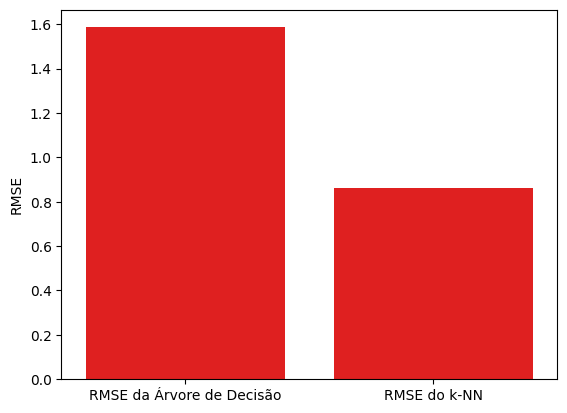

In [26]:
eixo = sns.barplot(x=['RMSE da Árvore de Decisão','RMSE do k-NN'], y=[RMSE_ad,RMSE_knn], color="RED")

eixo.set_ylabel("RMSE");

Percebe-se que para as circunstâncias apresentadas o modelo de k-NN se saiu melhor que a Árvore de Decisão, com um menor RMSE

## Conclusão

Com a realização da missão, obtivemos XP em feitiços de premonição, permitindo responder todas as hipóteses de Vostrasirus Baba e melhoramos nossas habilidades em Feitiços de Visualização (plotagem de gráficos). Milu Iluminarius MLVI ficou contente com os resultados, promovendo a guilda como segurança particular do rei. A equipe teve 3 conclusões:
- A normalização padrão dos dados não melhora a performance para o modelo de k-NN
- A utilização do PCA apresentou um menor RMSE para o modelo k-NN
- O modelo k-NN teve uma melhor predição em relação à árvore de decisão

## Referências

[1] Dataset do projeto final: https://archive.ics.uci.edu/dataset/551/gas+turbine+co+and+nox+emission+data+set

[2] Documentação do Pandas: https://pandas.pydata.org/docs/

[3] Método Describe: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

[4] Cassar, Daniel - Material de aula: 'Tratamento de dados.ipynb'

[5] Cassar, Daniel - Material de aula: 'Aprendizado de máquina, k-NN e métricas.ipynb'

[6] FACELI, Katti; LORENA, AC; GAMA, João; et al. Inteligência Artificial: uma abordagem de Aprendizado de Máquina. 2. ed., 2021.

[7] GRUS, Joel. Data Science from Scratch: First Principles with Python. 2. ed. Sebastopol, CA: O’Reilly Media, 2019.

[8] Cassar, Daniel - Material de aula: 'Seleção de atributos.ipynb'

[9] Multicolinearidade na Wikipédia [https://en.wikipedia.org/wiki/Multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity)

[10] Sobre como calcular o $R^2$ para modelos lineares com ou sem intercepto [https://stats.stackexchange.com/a/37442](https://stats.stackexchange.com/a/37442)

[11] Cassar, Daniel - Material de aula: 'Split de dados de treino e teste.ipynb'

[12] RASCHKA, Sebastian. Model Evaluation, Model Selection, and Algorithm Selection in Machine Learning. 2020. Disponível em: [http://arxiv.org/abs/1811.12808](http://arxiv.org/abs/1811.12808). Acesso em: 27 out. 2024.

[13] Documentação do `Scikit-learn` com todas as bibliotecas usadas: https://scikit-learn.org/stable/index.html

[14] Documentação do Seaborn: https://seaborn.pydata.org/api.html

[15] Cassar, Daniel - Material de aula: 'Redução de dimensionalidade com PCA.ipynb'

[16] Tutorial sobre PCA [https://towardsdatascience.com/principal-component-analysis-pca-explained-visually-with-zero-math-1cbf392b9e7d](https://towardsdatascience.com/principal-component-analysis-pca-explained-visually-with-zero-math-1cbf392b9e7d)


[17] Cassar, Daniel - Material de aula: 'Dados sintéticos e pipeline.ipynb'

[18] Pipelines do `scikit-learn` [https://scikit-learn.org/stable/modules/compose.html](https://scikit-learn.org/stable/modules/compose.html)

[19] Cassar, Daniel - Material de aula: 'Árvore de decisão.ipynb'

[20] Guia do usuário do `scikit-learn` sobre árvores de decisão [https://scikit-learn.org/stable/modules/tree.html#tree](https://scikit-learn.org/stable/modules/tree.html#tree)

